In [1]:
## Importing SOCAT synthesis data into a readable and usable format

# Libraries needed

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

pd.set_option('display.max_columns', None)

In [2]:
# Load observational data
# Skip first 253 rows due to data inconsistency issues

arctic = pd.read_table('/home/fid000/WORK/ANALYSIS/DATA/SOCATv2021_Arctic.tsv',
                    sep = '\t',
                    skiprows = 253)

# Rename columns since column headers get cut off

arctic.columns = ['Expocode', 'Version', 'Source_DOI', 'QC_Flag', 'Year', 'Month', 'Day', 'Hour',
                'Minute', 'Seconds', 'Longitude', 'Latitude', 'Sample_Depth', 'Salinity', 'SST',
               'Tequ', 'PPPP', 'Pequ', 'WOA_SSS', 'NCEP_SLP', 'ETOPO2_Depth', 'Dist_to_land',
               'GVCO2', 'xCO2water_equ_dry', 'xCO2water_SST_dry', 'pCO2water_equ_wet', 'pCO2water_SST_wet',
               'fCO2water_equ_wet', 'fCO2water_SST_wet', 'fCO2rec', 'fCO2rec_src', 'fCO2rec_flag']

/home/fid000/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Converting columns year, month and day to a datetime object in a new column called 'Date'

arctic['Date'] = pd.to_datetime(arctic[['Year','Month','Day']])

In [4]:
arctic.head()

,Expocode,Version,Source_DOI,QC_Flag,Year,Month,Day,Hour,Minute,Seconds,Longitude,Latitude,Sample_Depth,Salinity,SST,Tequ,PPPP,Pequ,WOA_SSS,NCEP_SLP,ETOPO2_Depth,Dist_to_land,GVCO2,xCO2water_equ_dry,xCO2water_SST_dry,pCO2water_equ_wet,pCO2water_SST_wet,fCO2water_equ_wet,fCO2water_SST_wet,fCO2rec,fCO2rec_src,fCO2rec_flag,Date
0,06AQ19930228,3.0U,NaN,D,1993,3,2,18,10,0.0,4.339,70.213,5.0,35.13,5.13,NaN,1011.0,NaN,35.099,1010.6,3246.0,424.0,362.244,NaN,NaN,NaN,NaN,NaN,338.6,338.6,6,2,1993-03-02
1,06AQ19930228,3.0U,NaN,D,1993,3,2,18,20,0.0,4.341,70.248,5.0,35.13,5.06,NaN,1011.0,NaN,35.099,1010.6,3224.0,425.0,362.244,NaN,NaN,NaN,NaN,NaN,335.9,335.9,6,2,1993-03-02
2,06AQ19930228,3.0U,NaN,D,1993,3,2,18,30,0.0,4.346,70.282,5.0,35.12,4.77,NaN,1011.0,NaN,35.099,1010.6,3219.0,426.0,362.245,NaN,NaN,NaN,NaN,NaN,332.7,332.7,6,2,1993-03-02
3,06AQ19930228,3.0U,NaN,D,1993,3,2,18,40,0.0,4.353,70.318,5.0,35.13,5.07,NaN,1011.0,NaN,35.099,1010.6,3215.0,427.0,362.246,NaN,NaN,NaN,NaN,NaN,339.5,339.5,6,2,1993-03-02
4,06AQ19930228,3.0U,NaN,D,1993,3,2,18,50,0.0,4.357,70.352,5.0,35.13,4.93,NaN,1010.0,NaN,35.099,1010.6,3210.0,427.0,362.246,NaN,NaN,NaN,NaN,NaN,336.1,336.1,6,2,1993-03-02


In [5]:
# Which year has the most data, how does 2020 compare to this year? Is this year 2020? 

year = arctic.Year.value_counts().sort_index
print(year)

<bound method Series.sort_index of 2017    197342
2015    197138
2011    182587
2014    177480
2016    150593
2012    130626
2019     96239
2018     89274
2009     79781
2013     54824
2020     54080
2007     51466
2006     49360
2008     38560
2010     31283
2005     25069
2003     15563
1999      6215
2004      3759
1995      2440
2000      2377
1996      2009
1997      1649
1993      1005
1982       957
1998       445
1981       415
1989       144
Name: Year, dtype: int64>


In [6]:
# Looking at 2019 from here on in the notebook 
# because it has the most data across the most months
# Can edit this to look at different years

arctic2019 = arctic[(arctic["Year"] == 2019)]
arctic2019.head()

,Expocode,Version,Source_DOI,QC_Flag,Year,Month,Day,Hour,Minute,Seconds,Longitude,Latitude,Sample_Depth,Salinity,SST,Tequ,PPPP,Pequ,WOA_SSS,NCEP_SLP,ETOPO2_Depth,Dist_to_land,GVCO2,xCO2water_equ_dry,xCO2water_SST_dry,pCO2water_equ_wet,pCO2water_SST_wet,fCO2water_equ_wet,fCO2water_SST_wet,fCO2rec,fCO2rec_src,fCO2rec_flag,Date
852547,33BI20191027,2020.0N,NaN,B,2019,11,8,10,53,26.0,191.576,66.260,NaN,30.98,2.75,3.12,1013.7,1016.4,31.369,1020.1,55.0,64.0,412.641,427.0,427.0,NaN,418.5,NaN,422.3,416.791,1,2,2019-11-08
852548,33BI20191027,2020.0N,NaN,B,2019,11,8,10,56,7.0,191.577,66.268,NaN,31.04,2.90,3.27,1014.1,1016.4,31.369,1020.1,55.0,65.0,412.641,428.3,428.3,NaN,419.7,NaN,423.7,418.030,1,2,2019-11-08
852549,33BI20191027,2020.0N,NaN,B,2019,11,8,10,58,51.0,191.577,66.275,NaN,31.04,2.89,3.30,1013.9,1016.5,31.369,1020.1,55.0,65.0,412.641,429.4,429.4,NaN,420.1,NaN,424.7,418.431,1,2,2019-11-08
852550,33BI20191027,2020.0N,NaN,B,2019,11,8,11,1,36.0,191.577,66.283,NaN,30.97,2.69,3.16,1014.0,1016.4,31.369,1020.1,55.0,66.0,412.640,428.4,428.4,NaN,418.1,NaN,423.8,416.384,1,2,2019-11-08
852551,33BI20191027,2020.0N,NaN,B,2019,11,8,11,4,21.0,191.577,66.291,NaN,30.83,2.64,3.08,1013.9,1016.4,31.369,1020.1,55.0,67.0,412.640,424.6,424.6,NaN,414.9,NaN,420.0,413.230,1,2,2019-11-08


In [7]:
# Group by 'date' variable

grouped2019 = arctic2019.groupby('Date')
day2019 = grouped2019.aggregate(np.mean)
day2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 2019-04-07 to 2019-11-26
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               172 non-null    float64
 1   Month              172 non-null    float64
 2   Day                172 non-null    float64
 3   Hour               172 non-null    float64
 4   Minute             172 non-null    float64
 5   Seconds            172 non-null    float64
 6   Longitude          172 non-null    float64
 7   Latitude           172 non-null    float64
 8   Sample_Depth       0 non-null      float64
 9   Salinity           172 non-null    float64
 10  SST                172 non-null    float64
 11  Tequ               172 non-null    float64
 12  PPPP               172 non-null    float64
 13  Pequ               172 non-null    float64
 14  WOA_SSS            172 non-null    float64
 15  NCEP_SLP           172 non-null    float64
 16  ETOPO2_

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

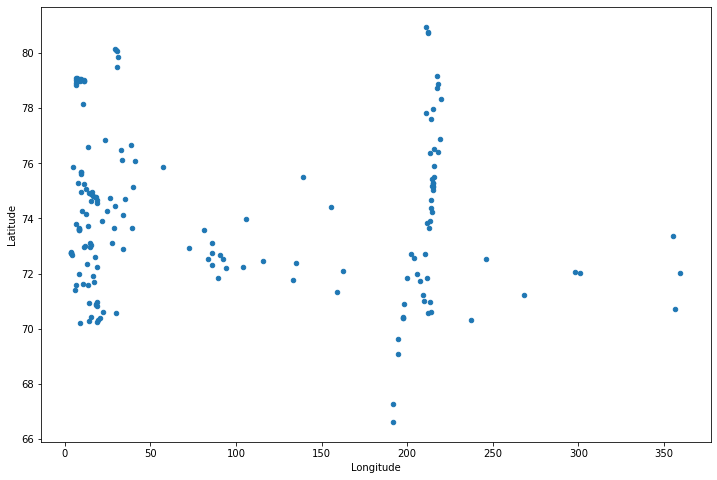

In [13]:
# Plot of long/lat to see general geographic distribution of data

day2019.plot.scatter('Longitude', 'Latitude')

In [12]:
max(day2019.Longitude)

359.4624747720365

<AxesSubplot:xlabel='SST', ylabel='Salinity'>

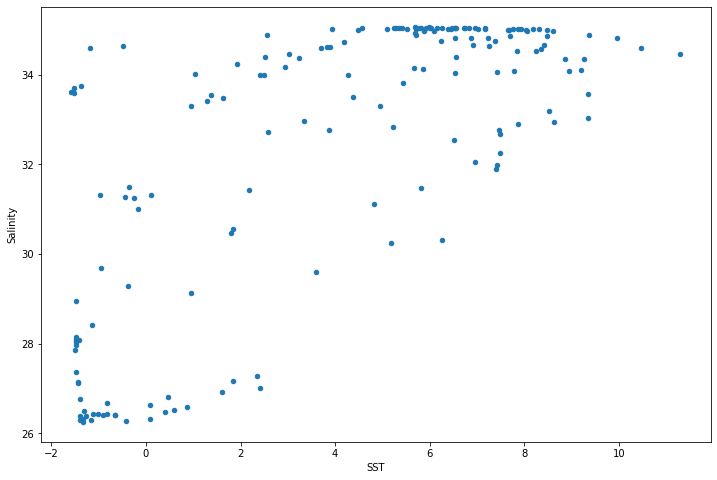

In [52]:
# Testing plots

day2019.plot.scatter('SST', 'Salinity')

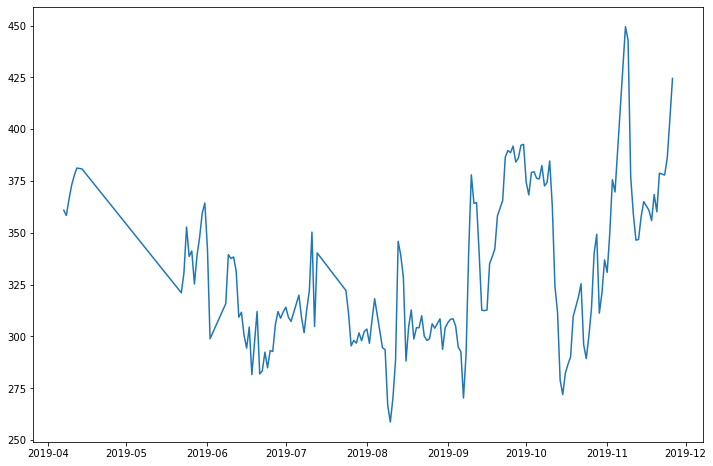

In [53]:
# Testing plots

plt.plot(day2019["fCO2rec"])

/home/fid000/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='fCO2rec'>

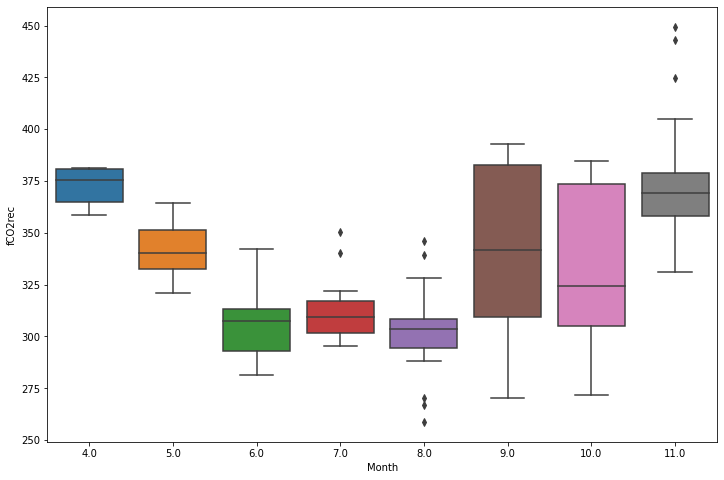

In [54]:
# Testing plots

sns.boxplot(day2019['Month'],
            day2019['fCO2rec'])